In [1]:
import os
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm

In [2]:
def convert_ar_characters(input_str):

    mapping = {
        'ك': 'ک',
        'گ':'گ',
        'دِ': 'د',
        'بِ': 'ب',
        'زِ': 'ز',
        'ذِ': 'ذ',
        'شِ': 'ش',
        'سِ': 'س',
        'ى': 'ی',
        'ي': 'ی'
    }
    return _multiple_replace(mapping, input_str)


def _multiple_replace(mapping, text):
    pattern = "|".join(map(re.escape, mapping.keys()))
    return re.sub(pattern, lambda m: mapping[m.group()], str(text))

def vv(row):
    X = row.split('-')
    return int(X[0]+X[1]+X[2])

def vv2(row):
    X = row.split('/')
    return int(X[0]+X[1]+X[2])

In [3]:
path = r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data\Capital Rise\\"

In [4]:
Data = pd.read_csv(path + "Data.csv")

In [5]:
Data[~Data.AbnormalReturn.isnull()].head()[['AbnormalReturn','name','Return','Ret_2','PRet_2','AbRet_2','PAbRet_2']]

,AbnormalReturn,name,Return,Ret_2,PRet_2,AbRet_2,PAbRet_2
0,-0.144262,آ س پ,-1.798855,NaN,NaN,4.028317,NaN
1,4.172579,آ س پ,4.579517,7.993339,NaN,6.012214,NaN
2,1.839635,آ س پ,3.264331,-0.955414,NaN,-3.698844,4.028317
3,-5.538479,آ س پ,-4.086353,-4.163454,7.993339,-6.439249,6.012214
4,-0.900770,آ س پ,-0.080386,0.643087,-0.955414,-2.327877,-3.698844


In [6]:
Data[[ 'JustRO', 'JustSaving', 'JustPremium', 'Hybrid', 'Revaluation']].columns

Index(['JustRO', 'JustSaving', 'JustPremium', 'Hybrid', 'Revaluation'], dtype='object')

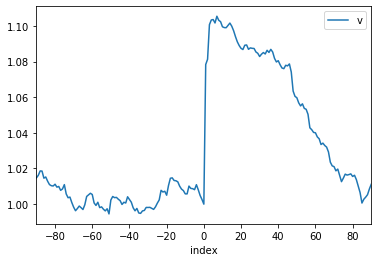

In [8]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[(Data.EPeriod == 0)&(Data.Hybrid == 1)][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[(Data.EPeriod == 0)&(Data.Hybrid == 1)][Ab].mean().to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRetHybrid =  t[['v','index']].rename(columns = {'v':'AbReturn-Hybrid'})

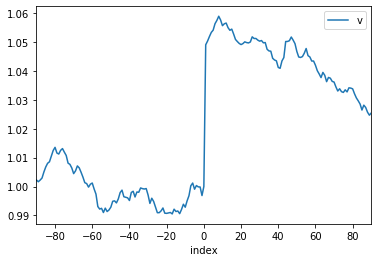

In [9]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[(Data.EPeriod == 0)&(Data.JustRO == 1)][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[(Data.EPeriod == 0)&(Data.JustRO == 1)][Ab].mean().to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRetCash =  t[['v','index']].rename(columns = {'v':'AbReturn-Cash'})

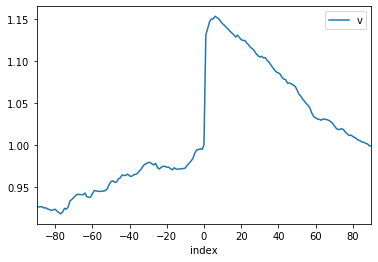

In [10]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[(Data.EPeriod == 0)&(Data.JustSaving == 1)][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[(Data.EPeriod == 0)&(Data.JustSaving == 1)][Ab].mean().to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRetSaving  =  t[['v','index']].rename(columns = {'v':'AbReturn-Saving'})

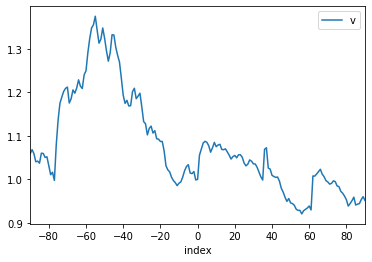

In [11]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[(Data.EPeriod == 0)&(Data.JustPremium == 1)][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[(Data.EPeriod == 0)&(Data.JustPremium == 1)][Ab].mean().to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRetPremium  =  t[['v','index']].rename(columns = {'v':'AbReturn-Premium'})

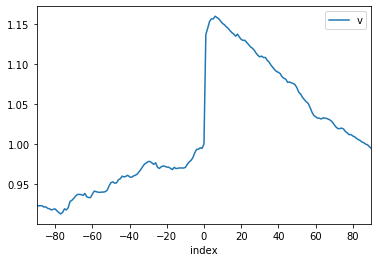

In [12]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[(Data.EPeriod == 0)&(Data.Revaluation == 1)][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[(Data.EPeriod == 0)&(Data.Revaluation == 1)][Ab].mean().to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRetRevalution =  t[['v','index']].rename(columns = {'v':'AbReturn-Revalution'})

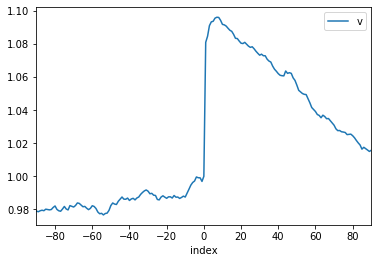

In [13]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[Data.EPeriod == 0][Ab].mean().to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRet =  t[['v','index']].rename(columns = {'v':'AbReturn'})

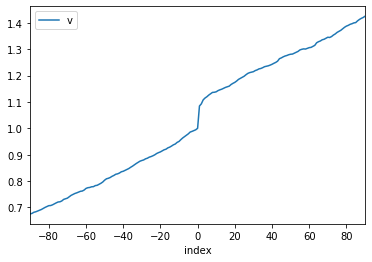

In [14]:
pAb = ["P"  +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = [ 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[5::]) )
t2 = Data[Data.EPeriod == 0][Ab].mean().to_frame().rename(index=lambda s: int(s[4::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
Ret =  t[['v','index']].rename(columns = {'v':'Return'})

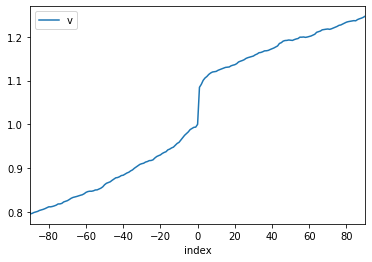

In [15]:
pAb = ["P"  +'E' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['E' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[6::]) )
t2 = Data[Data.EPeriod == 0][Ab].mean().to_frame().rename(index=lambda s: int(s[5::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
ERet = t[['v','index']].rename(columns = {'v':'EReturn'})

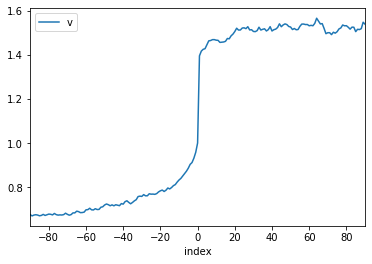

In [16]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].quantile(0.95, numeric_only=True).to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[Data.EPeriod == 0][Ab].quantile(0.95, numeric_only=True).to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0.95]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0.95]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0.95]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRet95 =  t[['v','index']].rename(columns = {'v':'AbReturn95'})

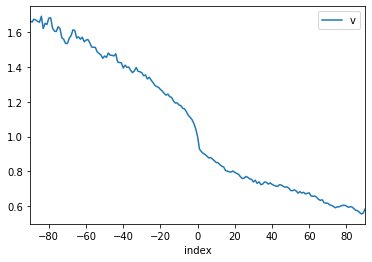

In [17]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].quantile(0.05, numeric_only=True).to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[Data.EPeriod == 0][Ab].quantile(0.05, numeric_only=True).to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0.05]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0.05]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0.05]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRet05 =  t[['v','index']].rename(columns = {'v':'AbReturn05'})

In [18]:
path+ "VCapRaise.xlsx"

'H:\\Economics\\Finance(Prof.Heidari-Aghajanzadeh)\\Data\\Capital Rise\\\\VCapRaise.xlsx'

In [19]:
dd = ERet.merge(Ret).merge(AbRet).merge(AbRet05).merge(AbRet95).merge(AbRetRevalution).merge(AbRetPremium).merge(AbRetSaving).merge(AbRetHybrid).merge(AbRetCash)

In [20]:
dd.to_excel(path + "VCapRaise.xlsx",index = False)

In [21]:
dd

,EReturn,index,Return,AbReturn,AbReturn05,AbReturn95,AbReturn-Revalution,AbReturn-Premium,AbReturn-Saving,AbReturn-Hybrid,AbReturn-Cash
0,0.795296,-90,0.675270,0.979029,1.663676,0.675462,0.923094,1.058893,0.926556,1.028510,1.002247
1,0.796445,-89,0.677332,0.978636,1.658159,0.669480,0.922569,1.068176,0.925801,1.029815,1.001654
2,0.798532,-88,0.681595,0.979239,1.674613,0.673325,0.922751,1.059016,0.925925,1.032011,1.002237
3,0.799923,-87,0.683358,0.979549,1.669784,0.674898,0.922613,1.040500,0.926066,1.031537,1.002942
4,0.801076,-86,0.686197,0.979258,1.661811,0.673404,0.921000,1.041832,0.924581,1.025136,1.005026
5,0.803254,-85,0.688959,0.980180,1.656887,0.670016,0.921291,1.037127,0.924775,1.025130,1.006769
6,0.804448,-84,0.692044,0.979943,1.691500,0.671709,0.919403,1.060030,0.923240,1.022247,1.008051
7,0.805738,-83,0.696127,0.979759,1.620293,0.676498,0.918824,1.059566,0.922786,1.020215,1.008572
8,0.807443,-82,0.700027,0.979985,1.650696,0.671618,0.917409,1.050381,0.921455,1.018874,1.010508
9,0.809576,-81,0.703150,0.981223,1.643890,0.674634,0.918263,1.051821,0.922474,1.018013,1.012485
